In [7]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
df = pd.read_csv('C:/Users/pejma/Nextcloud/PDE model/Final2/random_dataset_8Apr.csv')
df2 = pd.read_csv('C:/Users/pejma/Nextcloud/PDE model/Final2/dataset_8_Apr.csv')

In [5]:
df2.describe()

,param_b,param_d,param_h2,param_r,param_h3,param_Dm,param_ts,param_S,IW,IW_at1,...,m2_3,m2_4,m2_5,p_1,p_2,p_3,p_4,p_5,T1_MRI,FLAIR_MRI
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.015015,0.137865,0.059865,0.600000,0.050500,0.050500,0.350000,0.250000,37.229430,13.628875,...,18.298573,15.794216,13.640145,29.614809,27.305097,23.686747,19.875321,17.746690,18.507716,33.658514
std,0.007093,0.078022,0.031256,0.115473,0.028580,0.028580,0.144341,0.086605,15.586271,5.875641,...,8.109703,8.719093,8.999434,17.023964,16.080095,14.535204,12.449664,11.408435,8.864667,16.156289
min,0.002731,0.002738,0.005733,0.400000,0.001001,0.001001,0.100010,0.100010,4.900000,2.500000,...,0.003655,0.001928,0.001139,4.257778,4.001201,3.290457,2.479352,1.856527,0.679705,2.263558
25%,0.008873,0.070301,0.032800,0.500012,0.025750,0.025750,0.225005,0.175007,25.900000,9.500000,...,15.561151,7.522702,3.596474,16.484492,15.069710,12.937602,10.976101,9.706449,11.741197,20.847962
50%,0.015016,0.137860,0.059866,0.600000,0.050501,0.050500,0.349995,0.250000,35.700000,13.500000,...,22.035347,20.016391,16.467813,25.638548,23.377295,19.914209,16.688907,14.956735,17.764536,32.350581
75%,0.021157,0.205425,0.086930,0.699987,0.075250,0.075248,0.474998,0.324995,48.300000,16.500000,...,23.830135,22.952531,22.055857,38.901883,35.745032,30.666527,25.438820,22.686834,24.734736,45.218006
max,0.027300,0.272990,0.114000,0.799990,0.100000,0.099996,0.599990,0.399990,92.400000,38.000000,...,41.791820,37.241538,34.933802,95.296766,95.296766,93.968448,86.235465,86.235465,62.545124,84.756538


In [9]:
# Split the data into training and test sets
df['m2_m1_ratio_rand'] = df['m2_1'] / df['m1_1']
df2['m2_m1_ratio_1'] = df2['m2_1'] / df2['m1_1']
df2['m2_m1_ratio_2'] = df2['m2_2'] / df2['m1_2']
df2['m2_m1_ratio_3'] = df2['m2_3'] / df2['m1_3']
df2['m2_m1_ratio_4'] = df2['m2_4'] / df2['m1_4']
df2['m2_m1_ratio_5'] = df2['m2_5'] / df2['m1_5']
df2['m2_m1_ratio_rand'] = df['m2_m1_ratio_rand']

In [11]:
# Calculate the first quartile (Q1) of the 'IW' column
Q1 = df2['IW'].quantile(0.25)

# Separate the dataset into two based on Q1
nodular = df2[df2['IW'] <= Q1]
infiltrative = df2[df2['IW'] > Q1]
nodular.describe()

,param_b,param_d,param_h2,param_r,param_h3,param_Dm,param_ts,param_S,IW,IW_at1,...,p_4,p_5,T1_MRI,FLAIR_MRI,m2_m1_ratio_1,m2_m1_ratio_2,m2_m1_ratio_3,m2_m1_ratio_4,m2_m1_ratio_5,m2_m1_ratio_rand
count,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,...,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000
mean,0.011108,0.058956,0.053170,0.600479,0.047409,0.050164,0.349826,0.246741,18.925931,10.660524,...,22.782871,18.930470,8.634479,14.980989,8.183100,7.910244,7.391855,6.430399,5.677094,7.516149
std,0.006841,0.051756,0.031455,0.115191,0.028512,0.028462,0.145401,0.086509,5.236238,6.742824,...,15.191097,13.529141,4.106664,5.687600,6.535641,6.467117,6.395178,6.325850,6.193395,6.519383
min,0.002731,0.002738,0.005733,0.400030,0.001001,0.001039,0.100110,0.100070,4.900000,2.500000,...,2.757246,2.063902,0.679705,2.263558,0.005341,0.005128,0.004419,0.002862,0.002128,0.003644
25%,0.005284,0.020520,0.025348,0.501273,0.022571,0.025609,0.222230,0.171558,15.400000,5.500000,...,10.993776,8.684930,5.915002,10.882563,2.836893,2.539794,2.064715,1.342186,0.986571,2.002125
50%,0.009114,0.041445,0.050140,0.601040,0.045467,0.050261,0.348900,0.245500,19.600000,8.500000,...,18.664597,15.266516,8.490919,15.037946,6.973034,6.684951,5.970915,4.503512,3.269342,6.160225
75%,0.016107,0.084335,0.079853,0.700060,0.071294,0.074868,0.475538,0.320250,23.100000,14.500000,...,31.255051,25.625861,10.474228,18.537788,11.707678,11.447458,10.843420,9.708025,8.640023,11.063414
max,0.027291,0.272950,0.113980,0.799880,0.099992,0.099981,0.599990,0.399990,25.900000,38.000000,...,86.235465,86.235465,53.431769,62.651710,38.735771,39.478607,43.357687,54.357777,58.316028,45.103296


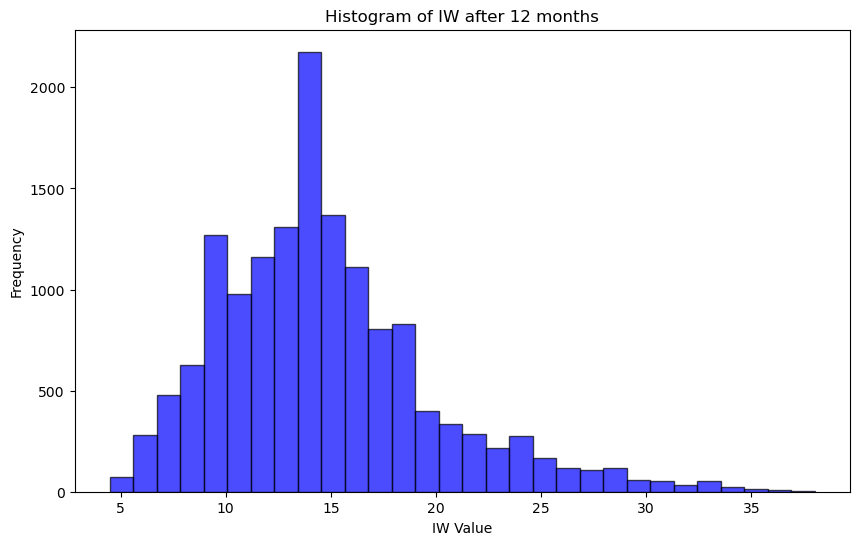

In [13]:
iw = infiltrative['IW_at1']

plt.figure(figsize=(10, 6))
plt.hist(iw, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of IW after 12 months')
plt.xlabel('IW Value')
plt.ylabel('Frequency')
# plt.grid(axis='y', alpha=0.75)
plt.show()

In [21]:
# Then, proceed with your loop
# Function to add noise to a dataset
def add_noise_to_dataset(dataset, features, sigma):
    """
    Adds Gaussian noise to specified features within a dataset.
    Args:
    - dataset (pd.DataFrame): The original pandas DataFrame.
    - features (list): A list of column names to which noise will be added.
    - sigma (float): The standard deviation of the Gaussian noise.
    
    Returns:
    - pd.DataFrame: A new DataFrame with noise added to the specified features.
    """
    noisy_dataset = dataset.copy()
    for feature in features:
        if feature in noisy_dataset.columns:
            # Generate noise
            noise = np.random.normal(0, sigma, size=noisy_dataset[feature].shape)
            # Add noise to the feature
            noisy_dataset[feature] += noise
        else:
            print(f"Feature {feature} not found in DataFrame.")
    return noisy_dataset

# Assuming df2 and nodular are already defined
np.random.seed(1)  # Ensure reproducibility

features = ['ki67', 'm2_m1_ratio_1', 'm2_m1_ratio_5', 'm2_m1_ratio_rand']

# Original nodular dataset without noise
nodular_no_noise = nodular.copy()

# Weak noise (sigma=1)
nodular_weak_noise = add_noise_to_dataset(nodular, features, sigma=1)

# Moderate noise (sigma=5)
nodular_moderate_noise = add_noise_to_dataset(nodular, features, sigma=5)

# Strong noise (sigma=10)
nodular_strong_noise = add_noise_to_dataset(nodular, features, sigma=10)

# # Example: Descriptive statistics for the 'ki67' feature across different noise levels
# print("No Noise:", nodular_no_noise['ki67'].describe())
# print("Weak Noise:", nodular_weak_noise['ki67'].describe())
# print("Moderate Noise:", nodular_moderate_noise['ki67'].describe())
# print("Strong Noise:", nodular_strong_noise['ki67'].describe())

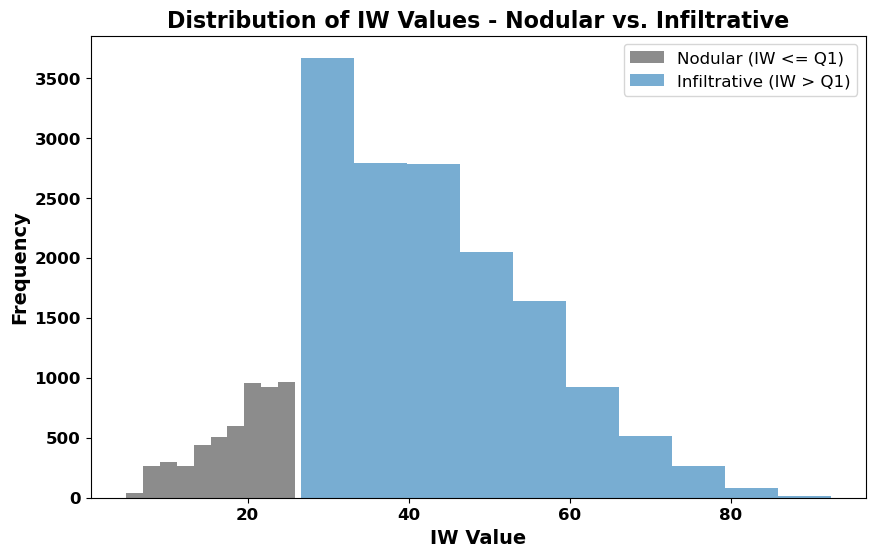

In [20]:
# Calculate the first quartile (Q1) of the 'IW' column
Q1 = df2['IW'].quantile(0.25)
# Separate the dataset into two based on Q1
nodular = df2[df2['IW'] <= Q1]
infiltrative = df2[df2['IW'] > Q1]
# Plotting
plt.figure(figsize=(10, 6))
# Histogram for nodular
plt.hist(nodular['IW'], alpha=0.9, label='Nodular (IW <= Q1)',color = 'grey')
# Histogram for infiltrative
plt.hist(infiltrative['IW'], alpha=0.6, label='Infiltrative (IW > Q1)')
plt.xlabel('IW Value', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title('Distribution of IW Values - Nodular vs. Infiltrative', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.show()

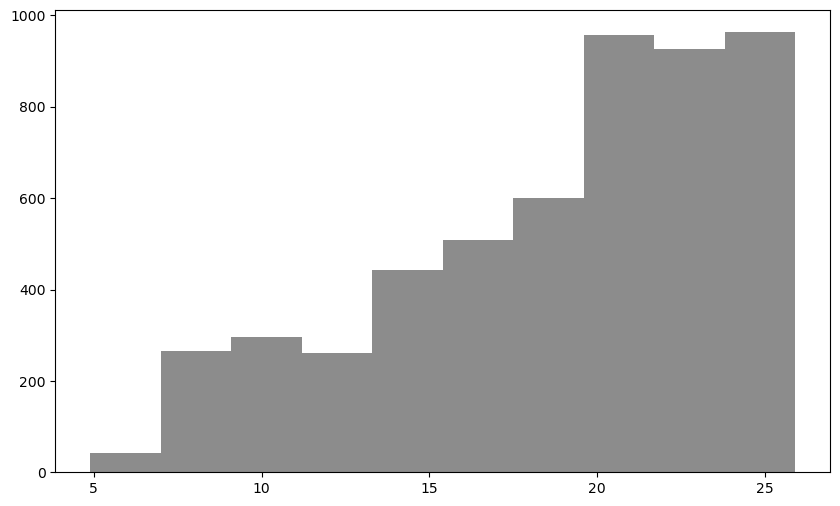

In [23]:
# Calculate the first quartile (Q1) of the 'IW' column
Q1 = df2['IW'].quantile(0.25)
# Separate the dataset into two based on Q1
nodular = df2[df2['IW'] <= Q1]
infiltrative = df2[df2['IW'] > Q1]
# Plotting
plt.figure(figsize=(10, 6))
# Histogram for nodular
plt.hist(nodular['IW'], alpha=0.9, label='Nodular (IW <= Q1)',color = 'grey')
# Histogram for infiltrative
# plt.hist(infiltrative['IW'], alpha=0.6, label='Infiltrative (IW > Q1)')
# plt.xlabel('IW Value')
# plt.ylabel('Frequency')
# plt.title('Distribution of IW Values - Nodular vs. Infiltrative')
# plt.legend()
plt.show()

In [11]:
# # Function to prepare data, train model, and visualize feature importance
# def prepare_train_visualize(dataset, title_suffix):
#     # Prepare the features (X) and target (Y)
#     X = dataset.drop(columns=["param_b", "param_d", 'param_h2', 'param_r', 'param_h3', 'param_Dm', 'param_ts', 'param_S', 'IW', "IW_at1", "IW_at2", "IW_at3", 'm1_1', 'm1_2', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5',
#                               'm1_3', 'm1_4', 'm1_5', 'm2_1', 'm2_2', 'm2_3', 'm2_4', 'm2_5', 'm2_m1_ratio_2',
#                               'm2_m1_ratio_3', 'm2_m1_ratio_4'])
#     Y = dataset['IW_at1'].values

#     # Split the data into training and test sets
#     X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#     # Train the Gradient Boosting model
#     gb_optimized = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=200, random_state=0)
#     gb_optimized.fit(X_train, Y_train)

#     # Feature importance visualization
#     feature_importance = gb_optimized.feature_importances_
#     features = X_train.columns
#     sorted_idx = feature_importance.argsort()
#     plt.figure(figsize=(10, 8))
#     plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
#     plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx], fontsize=12)
#     plt.xticks(fontsize=12)
#     plt.title(f'Feature Importance Visualization {title_suffix}', fontsize=16)
#     plt.show()

# # Assuming nodular_no_noise, nodular_weak_noise, nodular_moderate_noise, nodular_strong_noise are defined
# prepare_train_visualize(nodular_no_noise, "No Noise")
# prepare_train_visualize(nodular_weak_noise, "Weak Noise")
# prepare_train_visualize(nodular_moderate_noise, "Moderate Noise")
# prepare_train_visualize(nodular_strong_noise, "Strong Noise")


In [19]:
def get_feature_importances(dataset):
    # Prepare the features (X) and target (Y)
    X = dataset.drop(columns=["param_b", "param_d", 'param_h2', 'param_r', 'param_h3', 'param_Dm', 'param_ts', 'param_S', 'IW', "IW_at1", "IW_at2", "IW_at3", 'm1_1', 'm1_2', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5',
                              'm1_3', 'm1_4', 'm1_5', 'm2_1', 'm2_2', 'm2_3', 'm2_4', 'm2_5', 'm2_m1_ratio_2',
                              'm2_m1_ratio_3', 'm2_m1_ratio_4'])
    Y = dataset['IW_at3'].values

    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

    # Standardize the features
    scaler = StandardScaler()
    X_train_standardized = scaler.fit_transform(X_train)
    X_test_standardized = scaler.transform(X_test)

    # Train the Gradient Boosting model on the standardized features
    gb_optimized = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=200, random_state=0)
    gb_optimized.fit(X_train_standardized, Y_train)  # Use standardized features here

    # Return the feature importances
    feature_importance = gb_optimized.feature_importances_
    return feature_importance  

# Assuming datasets are prepared: nodular_no_noise, nodular_weak_noise, nodular_moderate_noise, nodular_strong_noise
datasets = {
    "Zero Noise": nodular_no_noise,
    "Weak Noise": nodular_weak_noise,
    "Moderate Noise": nodular_moderate_noise,
    "Strong Noise": nodular_strong_noise
}

# Prepare the features for labeling the x-axis in the plot
features = nodular_no_noise.drop(columns=["param_b", "param_d", 'param_h2', 'param_r', 'param_h3', 'param_Dm', 'param_ts', 'param_S', 'IW', "IW_at1", "IW_at2", "IW_at3", 'm1_1', 'm1_2', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5',
                                          'm1_3', 'm1_4', 'm1_5', 'm2_1', 'm2_2', 'm2_3', 'm2_4', 'm2_5', 'm2_m1_ratio_2',
                                          'm2_m1_ratio_3', 'm2_m1_ratio_4']).columns

# Initialize a dictionary to hold the feature importance from each dataset
all_importances = {noise_level: get_feature_importances(dataset) for noise_level, dataset in datasets.items()}



NameError: name 'nodular_no_noise' is not defined

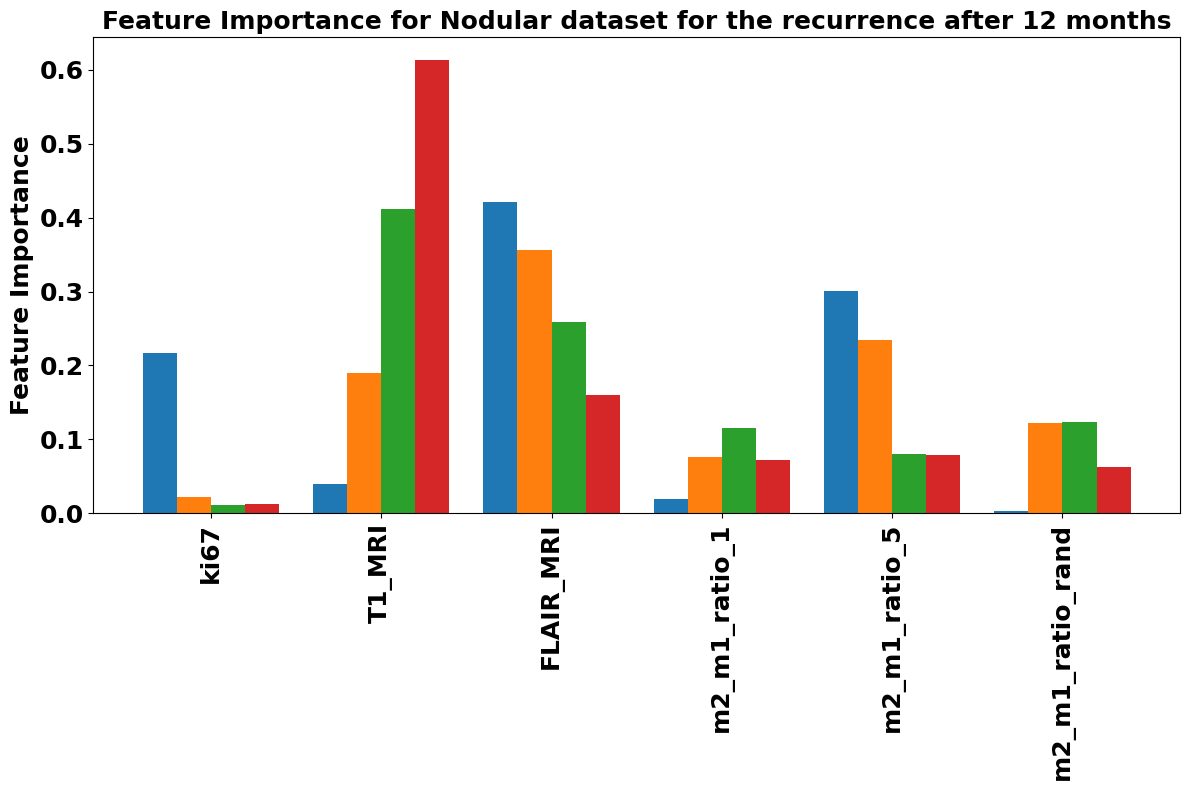

In [111]:
# Number of groups and bar width
n_groups = len(features)
bar_width = 0.2

# Set position of bar on X axis
positions = np.arange(n_groups)

# Creating the plot
plt.figure(figsize=(12, 8))
for idx, (noise_level, importances) in enumerate(all_importances.items()):
    plt.bar(positions + idx * bar_width, importances, bar_width, label=noise_level)

# Add xticks on the middle of the group bars
# plt.xlabel('Features', fontsize=16)
plt.ylabel('Feature Importance', fontsize=18, fontweight='bold')
# plt.xlabel('Features', fontsize=18, fontweight='bold')  # Un-commented and set font size and weight
plt.xticks([p + bar_width/2 * (len(all_importances)-1) for p in positions], features, rotation='vertical', fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.title('Feature Importance for Nodular dataset for the recurrence after 12 months', fontsize=18, fontweight='bold')

# Create legend & Show the plot
# plt.legend(fontsize=14, title='Noise Levels', title_fontsize='14', frameon=True, shadow=True)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

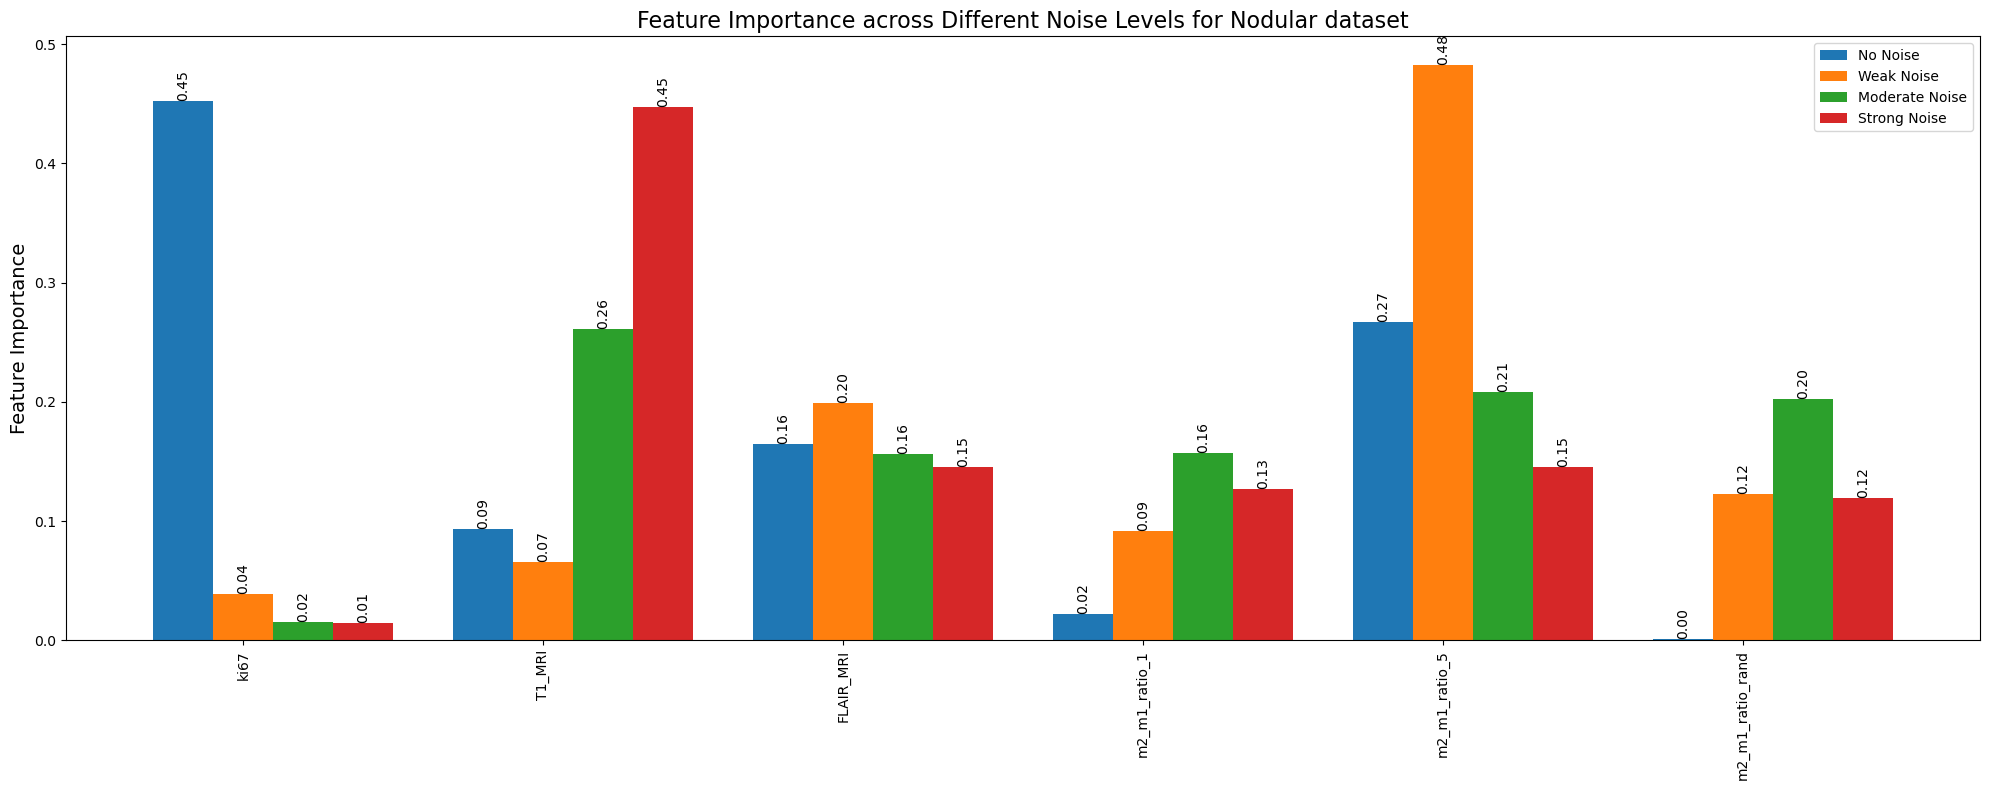

In [13]:
# Number of groups and bar width
n_groups = len(features)
bar_width = 0.2

# Set position of bar on X axis
positions = np.arange(n_groups)

# Creating the plot
plt.figure(figsize=(20, 8))  # Adjusted figure size for better visibility
bars = []  # To keep track of bar containers for annotations
for idx, (noise_level, importances) in enumerate(all_importances.items()):
    bar = plt.bar(positions + idx * bar_width, importances, bar_width, label=noise_level)
    bars.append(bar)

# Annotate each bar with its value
for bar in bars:
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', rotation=90)

plt.ylabel('Feature Importance', fontsize=14)
plt.xticks(positions + bar_width, features, rotation='vertical')
plt.title('Feature Importance across Different Noise Levels for Nodular dataset', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

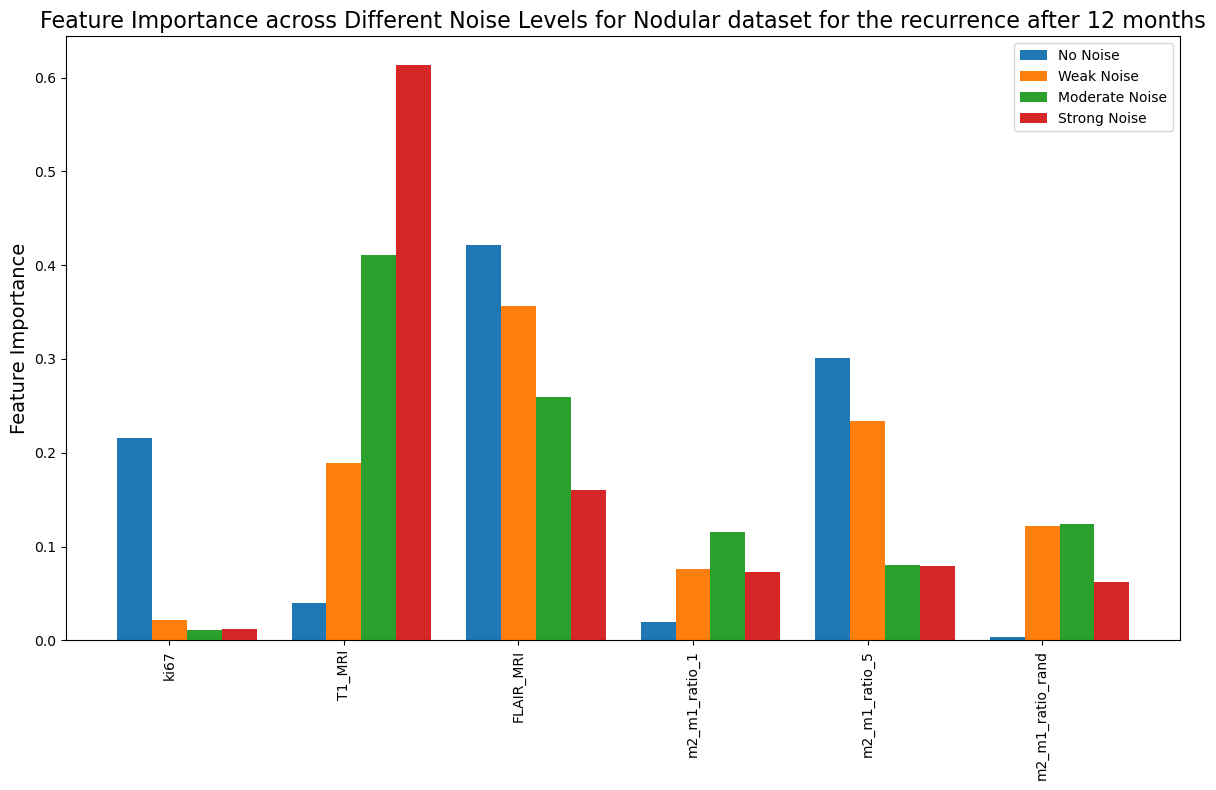

In [14]:
def get_feature_importances(dataset):
    # Prepare the features (X) and target (Y)
    X = dataset.drop(columns=["param_b", "param_d", 'param_h2', 'param_r', 'param_h3', 'param_Dm', 'param_ts', 'param_S', 'IW', "IW_at1", "IW_at2", "IW_at3", 'm1_1', 'm1_2', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5',
                              'm1_3', 'm1_4', 'm1_5', 'm2_1', 'm2_2', 'm2_3', 'm2_4', 'm2_5', 'm2_m1_ratio_2',
                              'm2_m1_ratio_3', 'm2_m1_ratio_4'])
    Y = dataset['IW_at3'].values

    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

    # Standardize the features
    scaler = StandardScaler()
    X_train_standardized = scaler.fit_transform(X_train)
    X_test_standardized = scaler.transform(X_test)

    # Train the Gradient Boosting model on the standardized features
    gb_optimized = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=200, random_state=0)
    gb_optimized.fit(X_train_standardized, Y_train)  # Use standardized features here

    # Return the feature importances
    feature_importance = gb_optimized.feature_importances_
    return feature_importance  

# Assuming datasets are prepared: nodular_no_noise, nodular_weak_noise, nodular_moderate_noise, nodular_strong_noise
datasets = {
    "No Noise": nodular_no_noise,
    "Weak Noise": nodular_weak_noise,
    "Moderate Noise": nodular_moderate_noise,
    "Strong Noise": nodular_strong_noise
}

# Prepare the features for labeling the x-axis in the plot
features = nodular_no_noise.drop(columns=["param_b", "param_d", 'param_h2', 'param_r', 'param_h3', 'param_Dm', 'param_ts', 'param_S', 'IW', "IW_at1", "IW_at2", "IW_at3", 'm1_1', 'm1_2', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5',
                                          'm1_3', 'm1_4', 'm1_5', 'm2_1', 'm2_2', 'm2_3', 'm2_4', 'm2_5', 'm2_m1_ratio_2',
                                          'm2_m1_ratio_3', 'm2_m1_ratio_4']).columns

# Initialize a dictionary to hold the feature importance from each dataset
all_importances = {noise_level: get_feature_importances(dataset) for noise_level, dataset in datasets.items()}

# Number of groups and bar width
n_groups = len(features)
bar_width = 0.2

# Set position of bar on X axis
positions = np.arange(n_groups)

# Creating the plot
plt.figure(figsize=(12, 8))
for idx, (noise_level, importances) in enumerate(all_importances.items()):
    plt.bar(positions + idx * bar_width, importances, bar_width, label=noise_level)

# Add xticks on the middle of the group bars
# plt.xlabel('Features', fontsize=16)
plt.ylabel('Feature Importance', fontsize=14)
plt.xticks(positions + bar_width, features, rotation='vertical')
plt.title('Feature Importance across Different Noise Levels for Nodular dataset for the recurrence after 12 months', fontsize=16)

# Create legend & Show the plot
plt.legend()
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

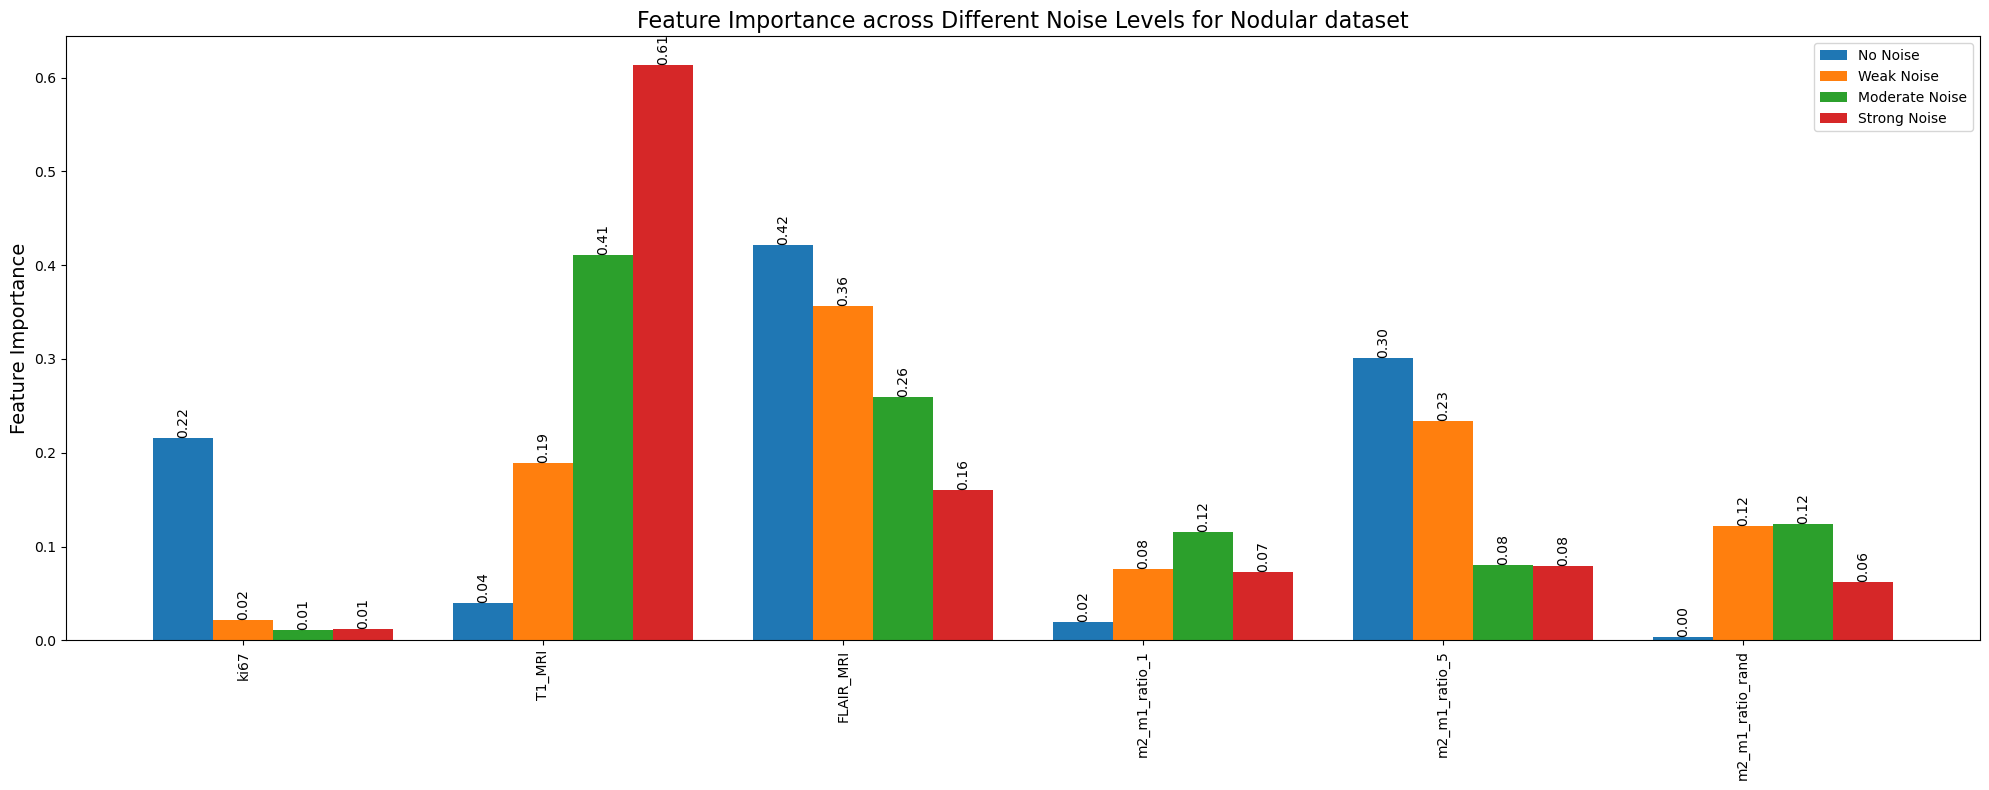

In [15]:
# Number of groups and bar width
n_groups = len(features)
bar_width = 0.2

# Set position of bar on X axis
positions = np.arange(n_groups)

# Creating the plot
plt.figure(figsize=(20, 8))  # Adjusted figure size for better visibility
bars = []  # To keep track of bar containers for annotations
for idx, (noise_level, importances) in enumerate(all_importances.items()):
    bar = plt.bar(positions + idx * bar_width, importances, bar_width, label=noise_level)
    bars.append(bar)

# Annotate each bar with its value
for bar in bars:
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', rotation=90)

plt.ylabel('Feature Importance', fontsize=14)
plt.xticks(positions + bar_width, features, rotation='vertical')
plt.title('Feature Importance across Different Noise Levels for Nodular dataset', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
# scenarios = {
#     'I': ['ki67','m2_m1_ratio_5'],
#     'II':['ki67', 'm2_m1_ratio_rand'],
#     'III':['m2_m1_ratio_5']
# }

In [104]:
datasets = {
    "No Noise": nodular_no_noise,
    "Weak Noise": nodular_weak_noise,
    "Moderate Noise": nodular_moderate_noise,
    "Strong Noise": nodular_strong_noise
}
scenarios = {
    'I': ['ki67', 'T1_MRI','FLAIR_MRI'],
    'II':['ki67','T1_MRI','FLAIR_MRI', 'm2_m1_ratio_rand'],
    'III':['ki67','T1_MRI','FLAIR_MRI','m2_m1_ratio_1'],
    'IV':['ki67','T1_MRI','FLAIR_MRI','m2_m1_ratio_5'],
    'V':['ki67','T1_MRI','FLAIR_MRI','m2_m1_ratio_1','m2_m1_ratio_5'],
}
# Initialize results storage
results = {'Scenario': [], 'Dataset': [], 'MSE': [], 'R2': []}



gb_optimized = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=200, random_state=0)

# Loop through each dataset and scenario combination
for dataset_name, dataset in datasets.items():
    for scenario_name, features in scenarios.items():
        X = dataset[features].values
        Y = dataset['IW_at1'].values  # Adjust the target column name as necessary
        
        # Splitting the data
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
        
        # Standardization
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Training the model
        gb_optimized.fit(X_train_scaled, Y_train)
        
        # Predicting the test set results
        Y_pred = gb_optimized.predict(X_test_scaled)
        
        # Evaluating the model
        mse = mean_squared_error(Y_test, Y_pred)
        r2 = r2_score(Y_test, Y_pred)
        
        # Storing results
        results['Scenario'].append(scenario_name)
        results['Dataset'].append(dataset_name)
        results['MSE'].append(mse)
        results['R2'].append(r2)

# Converting results to a DataFrame for easier handling
results_df = pd.DataFrame(results)

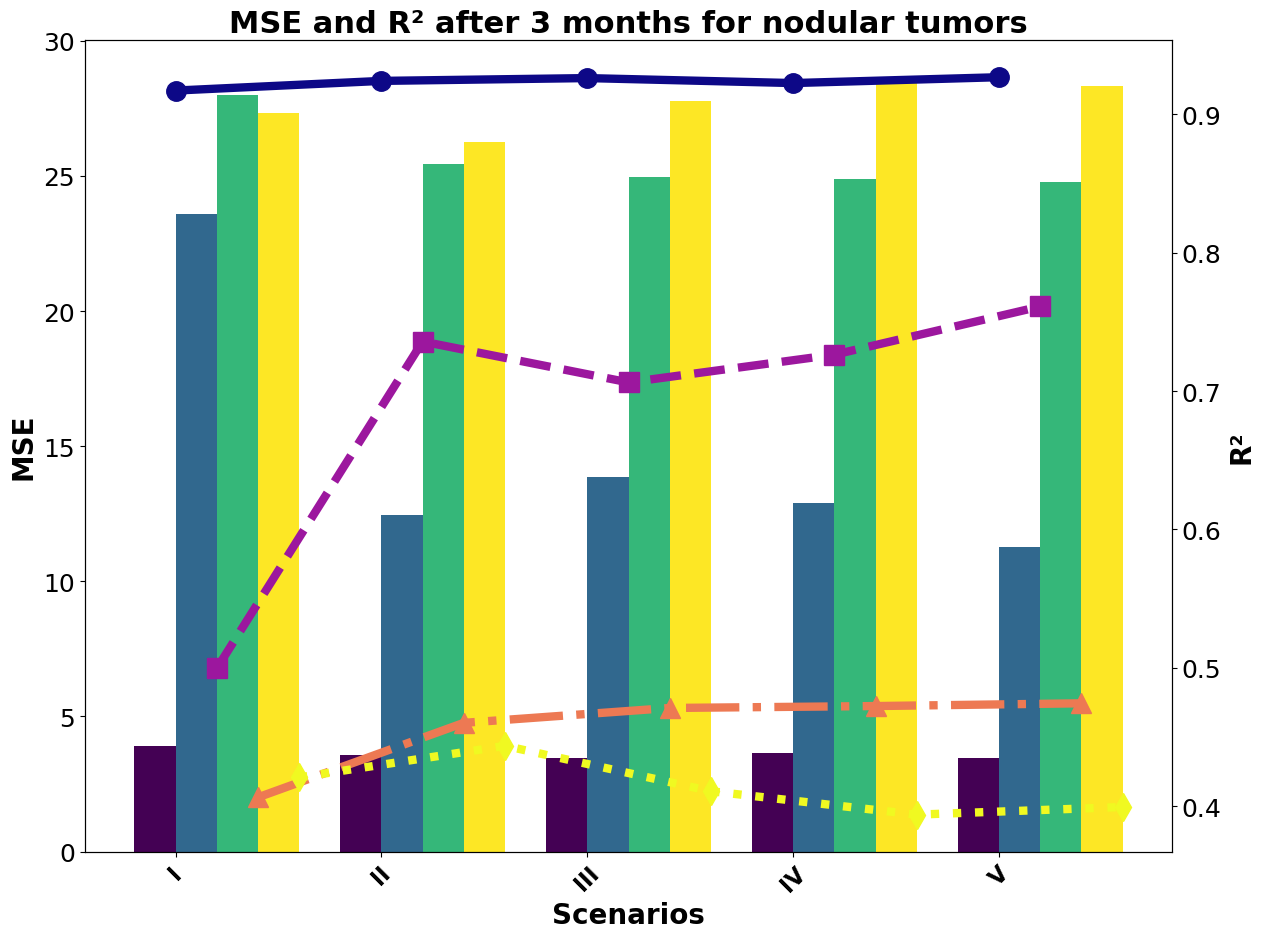

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming results_df, scenarios, and datasets are predefined
ind = np.arange(len(scenarios))  # The x locations for the groups
width = 0.2  # The width of the bars

# Start plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Define color palettes for MSE bars and R² lines
mse_colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))  # Generating a color map for MSE bars
r2_colors = plt.cm.plasma(np.linspace(0, 1, len(datasets)))  # Generating a color map for R² lines

# Define different line styles and markers
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'd']  # Different markers for each line

# Plotting MSE bars
for i, dataset in enumerate(datasets):
    mse_values = results_df[results_df['Dataset'] == dataset]['MSE']
    ax1.bar(ind + i * width, mse_values, width, color=mse_colors[i], label=f'{dataset} MSE')

# Configure the first y-axis (ax1)
ax1.set_xlabel('Scenarios', fontsize=20, fontweight='bold')
ax1.set_ylabel('MSE', fontsize=20, fontweight='bold')
ax1.set_title('MSE and R² after 3 months for nodular tumors', fontsize=22, fontweight='bold')
ax1.set_xticks(ind + width / 2)  # Adjusting x-ticks to the middle of the group of bars
ax1.set_xticklabels(scenarios, rotation=45, fontsize=16, fontweight='bold')

# Placing MSE legend outside the plot to the top left
# ax1.legend(loc='upper left', bbox_to_anchor=(-0.55, 0.01), title="MSE", fontsize=14, title_fontsize=16, frameon=True, shadow=True)

# Instantiate the second y-axis (ax2) for R² values
ax2 = ax1.twinx()
ax2.set_ylabel('R²', fontsize=20, fontweight='bold')
ax1.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
# Plotting R² with markers centered on the bars
for i, dataset in enumerate(datasets):
    r2_values = results_df[results_df['Dataset'] == dataset]['R2']
    ax2.plot(ind + i * width + width / 2, r2_values, color=r2_colors[i], marker=markers[i], linestyle=line_styles[i], linewidth=6, markersize=14, label=f'{dataset} R²')

# Placing R² legend outside the plot to the top right
# ax2.legend(loc='upper right', bbox_to_anchor=(1.15, 0.01), title="R²", fontsize=14, title_fontsize=16, frameon=True, shadow=True)

fig.set_size_inches(w=15, h=10)  # Adjust as necessary
plt.tight_layout(rect=[0, 0, 0.85, 0.95])  # Adjust rect as necessary to prevent clipping
plt.show()


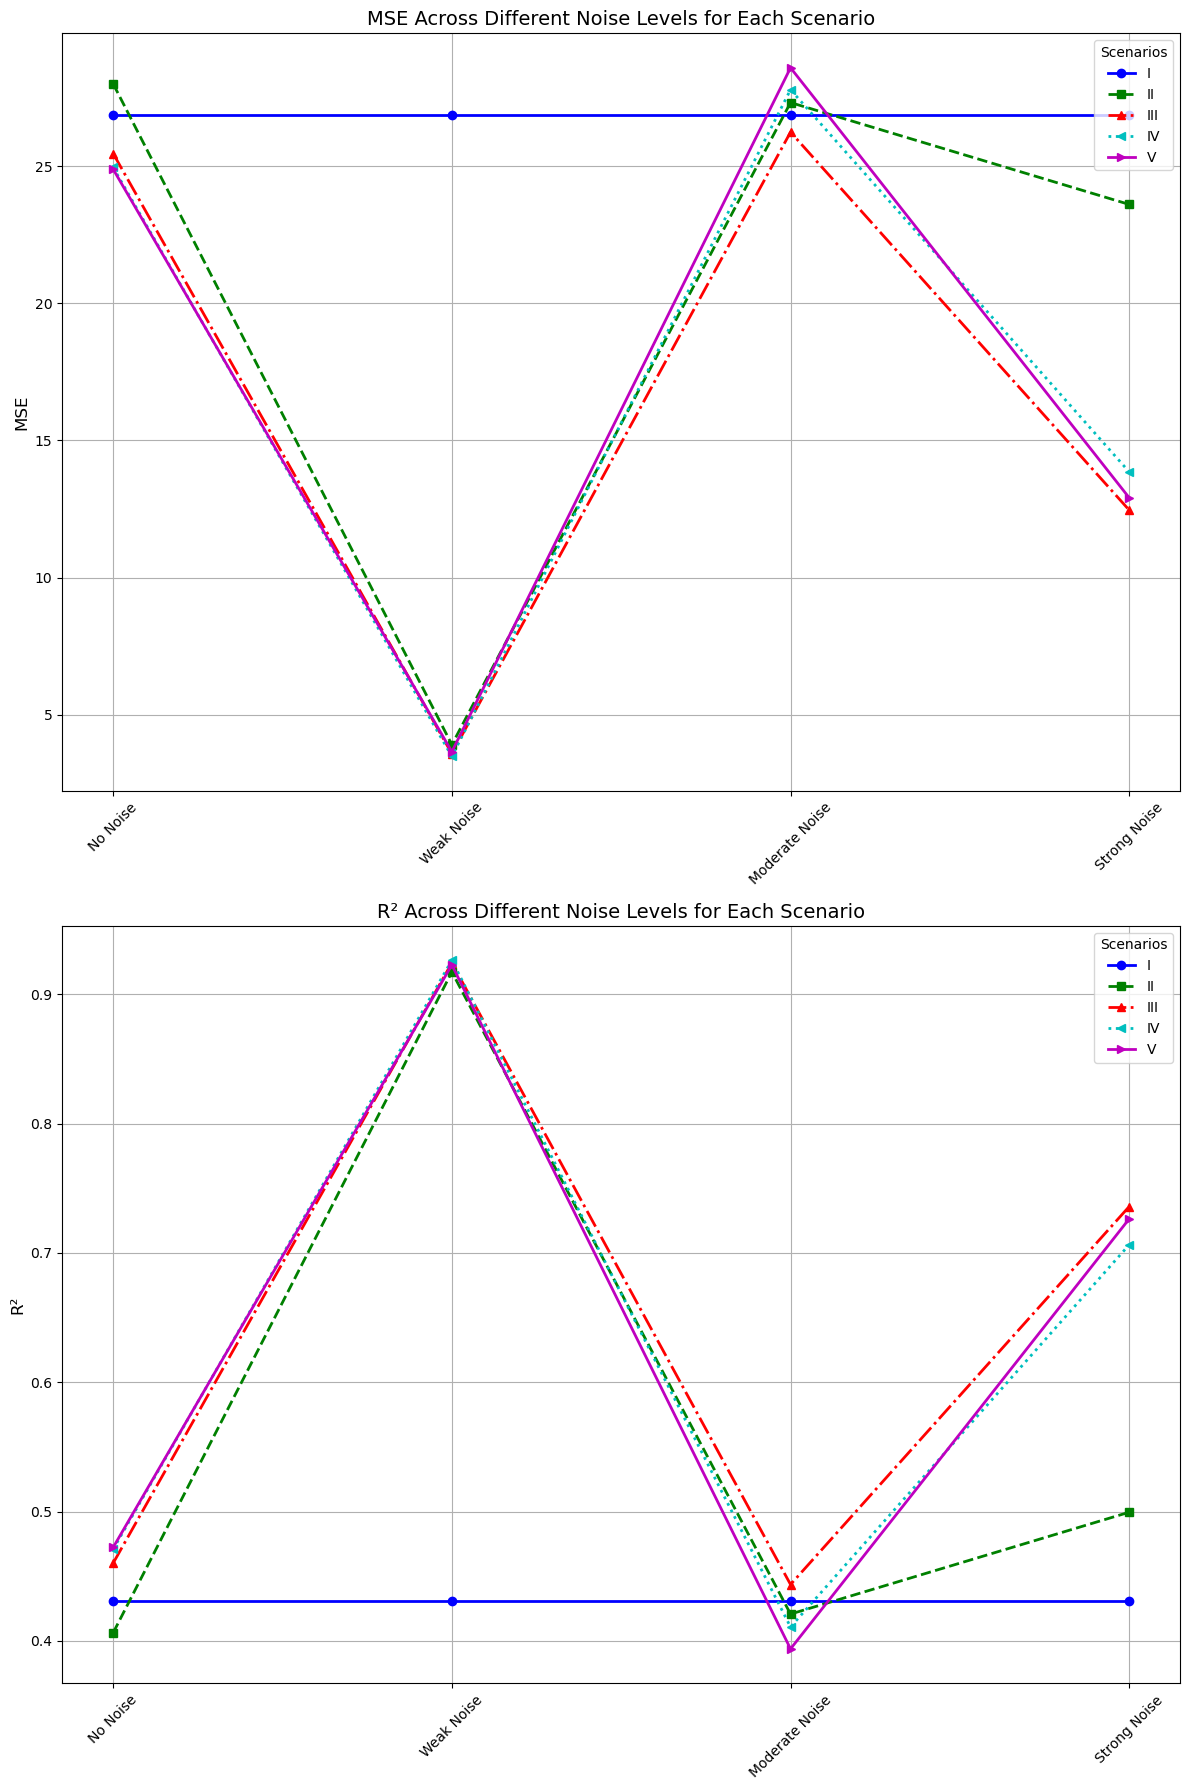

In [32]:
# Assuming results_df is already defined and contains the necessary columns
scenarios = results_df['Scenario'].unique()
datasets = results_df['Dataset'].unique()

# Setup for line styles and markers to differentiate each scenario
markers = ['o', 's', '^', '<', '>']  # Extend as needed
line_styles = ['-', '--', '-.', ':']  # Extend as needed
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Extend as needed if you have more scenarios

# Preparing the dataset order for plotting
dataset_order = np.arange(len(datasets))

# Creating two plots, one for MSE and one for R²
fig, (ax_mse, ax_r2) = plt.subplots(2, 1, figsize=(12, 18))

for idx, scenario in enumerate(scenarios):
    # Extracting MSE and R² for the current scenario across different datasets
    scenario_data = results_df[results_df['Scenario'] == scenario].sort_values(by='Dataset')
    mse_values = scenario_data['MSE'].values
    r2_values = scenario_data['R2'].values
    
    # Plotting MSE
    ax_mse.plot(dataset_order, mse_values, label=scenario, color=colors[idx % len(colors)], marker=markers[idx % len(markers)], linestyle=line_styles[idx % len(line_styles)], linewidth=2)
    
    # Plotting R²
    ax_r2.plot(dataset_order, r2_values, label=scenario, color=colors[idx % len(colors)], marker=markers[idx % len(markers)], linestyle=line_styles[idx % len(line_styles)], linewidth=2)

# Setting titles
ax_mse.set_title('MSE Across Different Noise Levels for Each Scenario', fontsize=14)
ax_r2.set_title('R² Across Different Noise Levels for Each Scenario', fontsize=14)

# Setting x-axis labels to dataset names
ax_mse.set_xticks(dataset_order)
ax_mse.set_xticklabels(datasets, rotation=45)
ax_r2.set_xticks(dataset_order)
ax_r2.set_xticklabels(datasets, rotation=45)

# Adding y-axis labels
ax_mse.set_ylabel('MSE', fontsize=12)
ax_r2.set_ylabel('R²', fontsize=12)

# Adding legends
ax_mse.legend(title='Scenarios', loc='upper right')
ax_r2.legend(title='Scenarios', loc='upper right')

# Adding grid for better readability
ax_mse.grid(True)
ax_r2.grid(True)

plt.tight_layout()
plt.show()

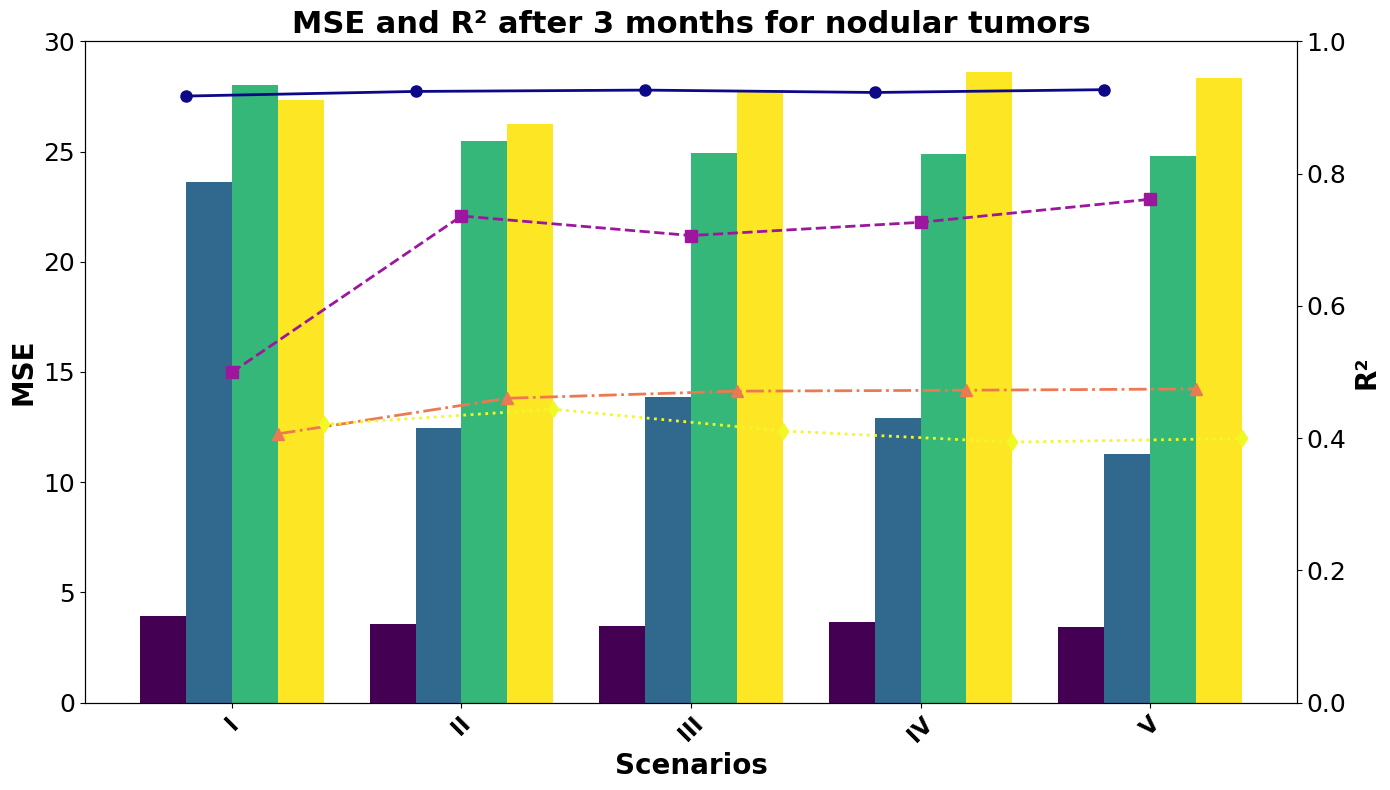

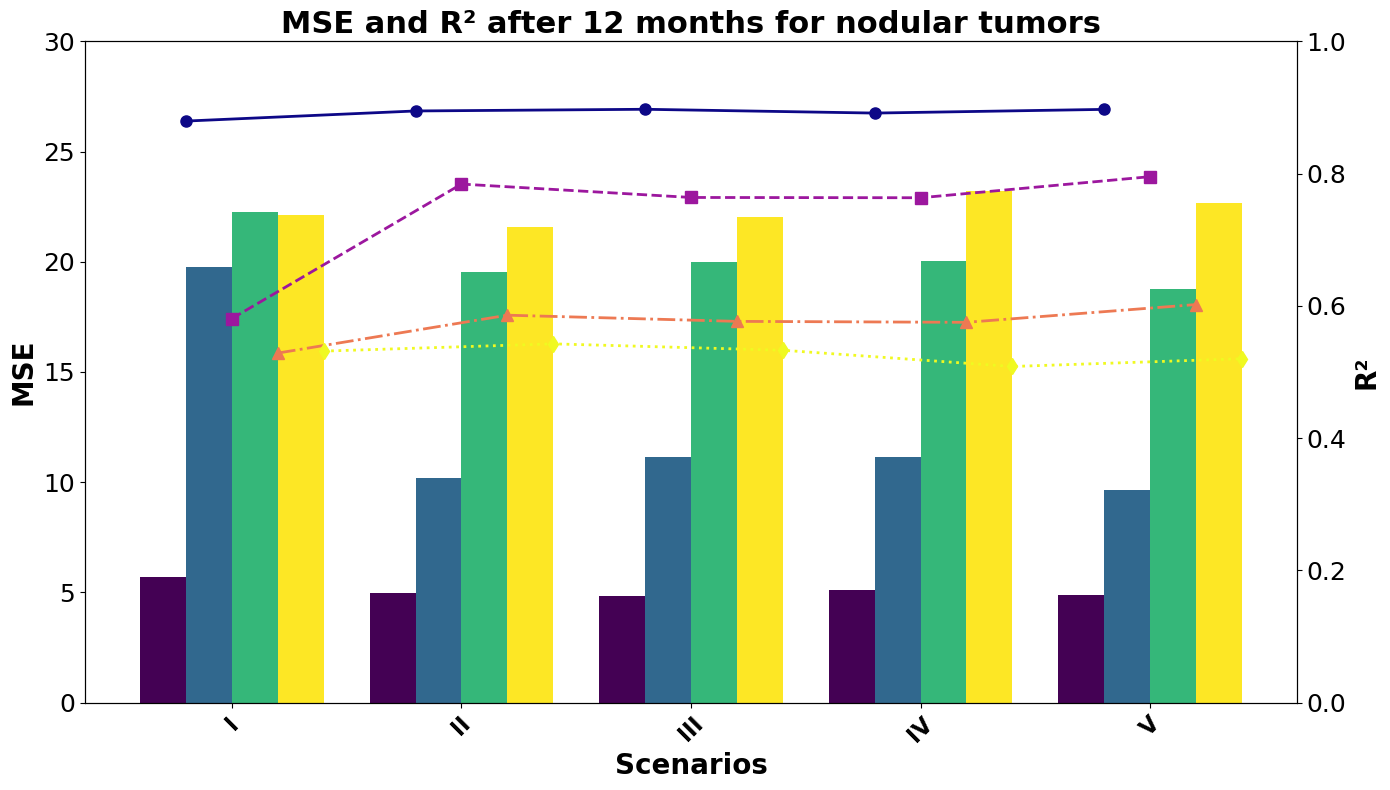

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Assuming nodular_no_noise, nodular_weak_noise, nodular_moderate_noise, nodular_strong_noise are predefined
datasets = {
    "No Noise": nodular_no_noise,
    "Weak Noise": nodular_weak_noise,
    "Moderate Noise": nodular_moderate_noise,
    "Strong Noise": nodular_strong_noise
}
scenarios = {
    'I': ['ki67', 'T1_MRI','FLAIR_MRI'],
    'II': ['ki67','T1_MRI','FLAIR_MRI', 'm2_m1_ratio_rand'],
    'III': ['ki67','T1_MRI','FLAIR_MRI','m2_m1_ratio_1'],
    'IV': ['ki67','T1_MRI','FLAIR_MRI','m2_m1_ratio_5'],
    'V': ['ki67','T1_MRI','FLAIR_MRI','m2_m1_ratio_1','m2_m1_ratio_5'],
}

# Initialize results storage
results = {'Scenario': [], 'Dataset': [], 'MSE_Y': [], 'R2_Y': [], 'MSE_Y2': [], 'R2_Y2': []}

gb_optimized = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=200, random_state=0)

# Loop through each dataset and scenario combination
for dataset_name, dataset in datasets.items():
    for scenario_name, features in scenarios.items():
        X = dataset[features].values
        Y = dataset['IW_at1'].values  # Adjust the target column name as necessary
        Y2 = dataset['IW_at3'].values  # Adding the second target variable
        
        # Splitting the data for Y
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
        
        # Standardization
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Training the model for Y
        gb_optimized.fit(X_train_scaled, Y_train)
        
        # Predicting the test set results for Y
        Y_pred = gb_optimized.predict(X_test_scaled)
        
        # Evaluating the model for Y
        mse_y = mean_squared_error(Y_test, Y_pred)
        r2_y = r2_score(Y_test, Y_pred)
        
        # Splitting the data for Y2
        X_train, X_test, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=0)
        
        # Standardization (use the same scaler for consistency)
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Training the model for Y2
        gb_optimized.fit(X_train_scaled, Y2_train)
        
        # Predicting the test set results for Y2
        Y2_pred = gb_optimized.predict(X_test_scaled)
        
        # Evaluating the model for Y2
        mse_y2 = mean_squared_error(Y2_test, Y2_pred)
        r2_y2 = r2_score(Y2_test, Y2_pred)
        
        # Storing results
        results['Scenario'].append(scenario_name)
        results['Dataset'].append(dataset_name)
        results['MSE_Y'].append(mse_y)
        results['R2_Y'].append(r2_y)
        results['MSE_Y2'].append(mse_y2)
        results['R2_Y2'].append(r2_y2)

# Converting results to a DataFrame for easier handling
results_df = pd.DataFrame(results)

# Plotting for Y (IW_at1) - after 3 months
fig1, ax1 = plt.subplots(figsize=(14, 8))

# Define color palettes for MSE bars and R² lines
mse_colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))  # Color map for MSE bars
r2_colors = plt.cm.plasma(np.linspace(0, 1, len(datasets)))  # Color map for R² lines

# Define different line styles and markers
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'd']  # Different markers for each line

# X locations for the groups
ind = np.arange(len(scenarios))
width = 0.2  # Width of the bars

# Plotting MSE bars for Y
for i, dataset in enumerate(datasets):
    mse_values_y = results_df[results_df['Dataset'] == dataset]['MSE_Y']
    ax1.bar(ind + i * width, mse_values_y, width, color=mse_colors[i], label=f'{dataset} MSE Y')

# Configure the first y-axis (ax1)
ax1.set_xlabel('Scenarios', fontsize=20, fontweight='bold')
ax1.set_ylabel('MSE', fontsize=20, fontweight='bold')
ax1.set_title('MSE and R² after 3 months for nodular tumors', fontsize=22, fontweight='bold')  # Updated title for Y
ax1.set_xticks(ind + width * (len(datasets) - 1) / 2)  # Adjust x-ticks to be at the center of grouped bars
ax1.set_xticklabels(scenarios.keys(), rotation=45, fontsize=16, fontweight='bold')
ax1.set_ylim(0, 30)  # Adjusted to set the MSE axis maximum to 30

# Instantiate the second y-axis (ax2) for R² values
ax2 = ax1.twinx()
ax2.set_ylabel('R²', fontsize=20, fontweight='bold')
ax1.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_ylim(0, 1)  # Adjust R² axis limits

# Plotting R² for Y with markers centered on the bars
for i, dataset in enumerate(datasets):
    r2_values_y = results_df[results_df['Dataset'] == dataset]['R2_Y']
    ax2.plot(ind + i * width + width / 2, r2_values_y, color=r2_colors[i], marker=markers[i], linestyle=line_styles[i], linewidth=2, markersize=8, label=f'{dataset} R² Y')

# Save the first plot as high-quality PNG
fig1.savefig('MSE_R2_Y_Nod.png', format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

# Plotting for Y2 (IW_at3) - after 12 months
fig2, ax3 = plt.subplots(figsize=(14, 8))

# Plotting MSE bars for Y2
for i, dataset in enumerate(datasets):
    mse_values_y2 = results_df[results_df['Dataset'] == dataset]['MSE_Y2']
    ax3.bar(ind + i * width, mse_values_y2, width, color=mse_colors[i], label=f'{dataset} MSE Y2')

# Configure the first y-axis (ax3)
ax3.set_xlabel('Scenarios', fontsize=20, fontweight='bold')
ax3.set_ylabel('MSE', fontsize=20, fontweight='bold')
ax3.set_title('MSE and R² after 12 months for nodular tumors', fontsize=22, fontweight='bold')  # Updated title for Y2
ax3.set_xticks(ind + width * (len(datasets) - 1) / 2)  # Adjust x-ticks to be at the center of grouped bars
ax3.set_xticklabels(scenarios.keys(), rotation=45, fontsize=16, fontweight='bold')
ax3.set_ylim(0, 30)  # Adjusted to set the MSE axis maximum to 30

# Instantiate the second y-axis (ax4) for R² values
ax4 = ax3.twinx()
ax4.set_ylabel('R²', fontsize=20, fontweight='bold')
ax3.tick_params(axis='y', labelsize=18)
ax4.tick_params(axis='y', labelsize=18)
ax4.set_ylim(0, 1)  # Adjust R² axis limits

# Plotting R² for Y2 with markers centered on the bars
for i, dataset in enumerate(datasets):
    r2_values_y2 = results_df[results_df['Dataset'] == dataset]['R2_Y2']
    ax4.plot(ind + i * width + width / 2, r2_values_y2, color=r2_colors[i], marker=markers[i], linestyle=line_styles[i], linewidth=2, markersize=8, label=f'{dataset} R² Y2')

# Save the second plot as high-quality PNG
fig2.savefig('MSE_R2_Y2_Nod.png', format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()
